# Decision Trees and Random Forests Project

The dataset is related to a financial company and our goal is to guess whether it will return it to us in paying a loan to a customer or not.

## Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Get the Data

In [2]:
data = pd.read_csv('loan_data.csv')

In [3]:
data.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


* credit.policy: 1 if the customer meets the credit underwriting criteria of LendingClub.com, and 0 otherwise.
* purpose: The purpose of the loan (takes values "credit_card", "debt_consolidation", "educational", "major_purchase", "small_business", and "all_other").
* int.rate: The interest rate of the loan, as a proportion (a rate of 11% would be stored as 0.11). Borrowers judged by LendingClub.com to be more risky are assigned higher interest rates.
* installment: The monthly installments owed by the borrower if the loan is funded.
* log.annual.inc: The natural log of the self-reported annual income of the borrower.
* dti: The debt-to-income ratio of the borrower (amount of debt divided by annual income).
* fico: The FICO credit score of the borrower.
* days.with.cr.line: The number of days the borrower has had a credit line.
* revol.bal: The borrower's revolving balance (amount unpaid at the end of the credit card billing cycle).
* revol.util: The borrower's revolving line utilization rate (the amount of the credit line used relative to total credit available).
* inq.last.6mths: The borrower's number of inquiries by creditors in the last 6 months.
* delinq.2yrs: The number of times the borrower had been 30+ days past due on a payment in the past 2 years.
* pub.rec: The borrower's number of derogatory public records (bankruptcy filings, tax liens, or judgments).

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [5]:
data.describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


## Exploratory Data Analysis (EDA)

             
Draw the histogram of the fico feature with credit.policy separation in the form of two graphs on top of each other.

Text(0.5, 0, 'FICO')

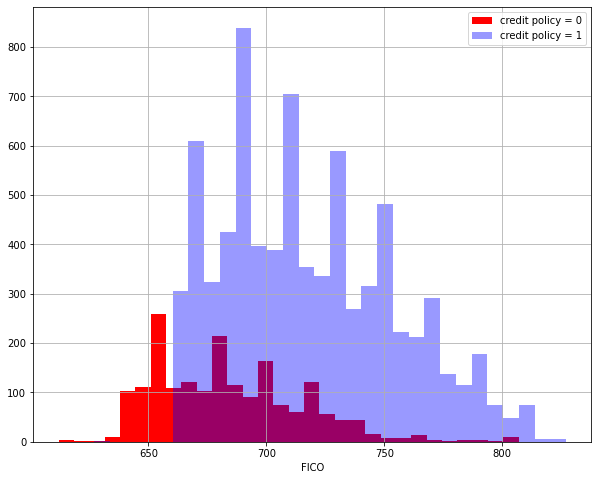

In [6]:
plt.figure(figsize=(10, 8))
data[data['credit.policy'] == 0]['fico'].hist(alpha=1, color='red', bins=30, label='credit policy = 0')
data[data['credit.policy'] == 1]['fico'].hist(alpha=0.4, color='blue', bins=30, label='credit policy = 1')
plt.legend()
plt.xlabel('FICO')


    
Draw the same plot above this time with label seperation or " not.fully.paid ".

Text(0.5, 0, 'FICO')

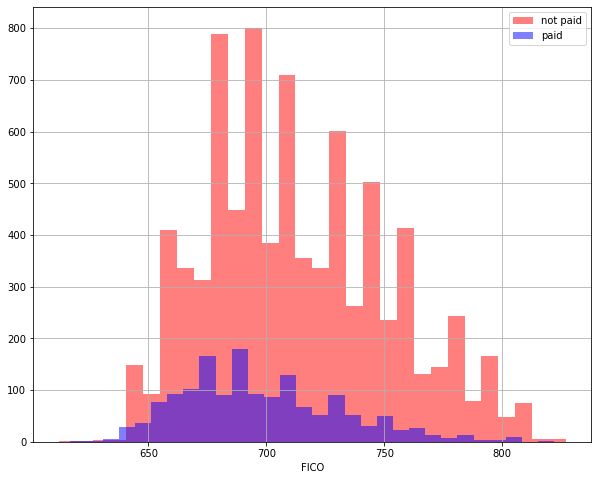

In [7]:
plt.figure(figsize=(10, 8))
data[data['not.fully.paid'] == 0]['fico'].hist(alpha=0.5, bins=30, color='red', label='not paid')
data[data['not.fully.paid'] == 1]['fico'].hist(alpha=0.5, bins=30, color='blue', label='paid')
plt.legend()
plt.xlabel('FICO')

Draw a countplot diagram for the purpose feature by separating the customers who succeeded in repaying the loan or failed. 
    
 

In [8]:
data.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='purpose', ylabel='count'>

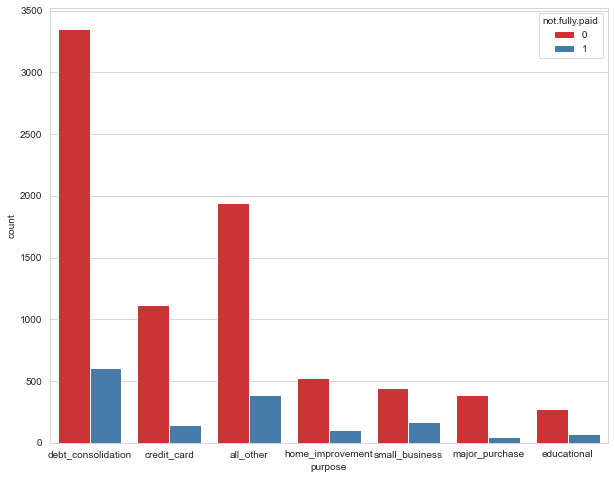

In [9]:
plt.figure(figsize=(10, 8))
sns.set_style('whitegrid')

sns.countplot(data['purpose'], hue=data['not.fully.paid'], palette='Set1')

Draw the joint plot according to two features, fico and int.rate.

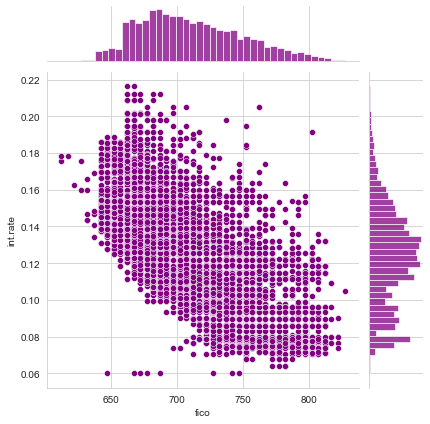

In [10]:
sns.jointplot(x='fico', y='int.rate', data=data, color='purple')

Well, it seems that we discovered a correlation, to check these correlations more accurate, draw a lmplot in terms of fico and with two different columns based on whether the loan has been paid or not and with credit.policy separation.

<Figure size 792x504 with 0 Axes>

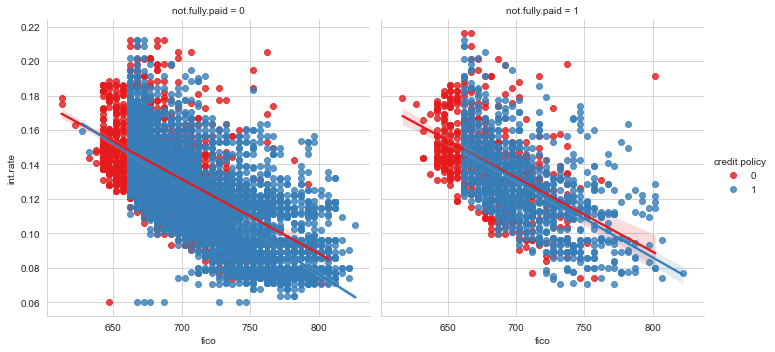

In [11]:
plt.figure(figsize=(11,7))
sns.lmplot(y='int.rate',x='fico',data=data,hue='credit.policy',col='not.fully.paid', palette='Set1')

<Figure size 792x504 with 0 Axes>

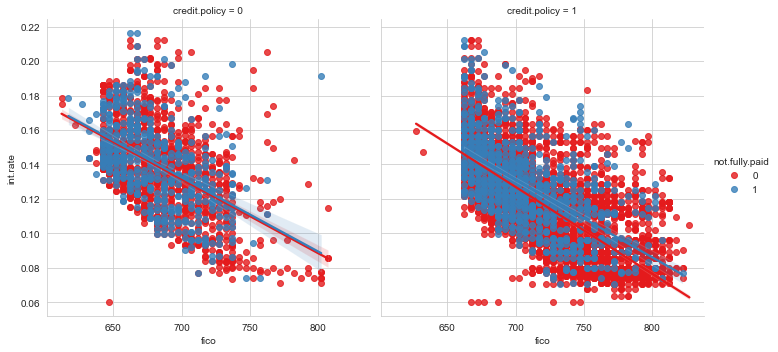

In [12]:
plt.figure(figsize=(11,7))
sns.lmplot(y='int.rate',x='fico',data=data ,hue='not.fully.paid',col='credit.policy', palette='Set1')

What's your colclusion ?!

result : we conclude if the int.rate is less, the FICO credit will increases.

# Setting up the Data

## Categorical Features

Convert the Categorical features to the Numeric features.

In [12]:
data.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [13]:
cat_data = pd.get_dummies(data['purpose'], prefix='purpose')
data = pd.concat([data, cat_data], axis=1).drop('purpose', axis=1)

In [14]:
data

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,purpose_all_other,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
0,1,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0,0,0,1,0,0,0,0
1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0,0,1,0,0,0,0,0
2,1,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0,0,0,1,0,0,0,0
3,1,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0,0,0,1,0,0,0,0
4,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9573,0,0.1461,344.76,12.180755,10.39,672,10474.000000,215372,82.1,2,0,0,1,1,0,0,0,0,0,0
9574,0,0.1253,257.70,11.141862,0.21,722,4380.000000,184,1.1,5,0,0,1,1,0,0,0,0,0,0
9575,0,0.1071,97.81,10.596635,13.09,687,3450.041667,10036,82.9,8,0,0,1,0,0,1,0,0,0,0
9576,0,0.1600,351.58,10.819778,19.18,692,1800.000000,0,3.2,5,0,0,1,0,0,0,0,1,0,0


## Train Test Split


Create the train and test data.

In [15]:
features = data.drop(['not.fully.paid'], axis=1)
label = data['not.fully.paid']

In [16]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(features, label, test_size=0.3, random_state=101)

## Training a Decision Tree Model

In [17]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()

In [18]:
dtc.fit(x_train, y_train)

DecisionTreeClassifier()

## Predictions and Evaluation of Decision Tree

In [19]:
prediction = dtc.predict(x_test)

In [20]:
pd.DataFrame({"Label":y_test, "Prediction":prediction})

,Label,Prediction
5244,0,0
1739,0,1
2780,0,0
7062,0,1
6661,0,0
...,...,...
9508,0,0
4348,0,1
4233,0,0
5363,0,0


In [21]:
dtc.score(x_test, y_test)

0.7237299930410578

In [22]:
from sklearn.metrics import confusion_matrix
print("* Confusion Matrix * \n", confusion_matrix(prediction, y_test))

* Confusion Matrix * 
 [[1969  332]
 [ 462  111]]


In [23]:
from sklearn.metrics import classification_report
print("* Classification Report * \n", classification_report(prediction, y_test))

* Classification Report * 
               precision    recall  f1-score   support

           0       0.81      0.86      0.83      2301
           1       0.25      0.19      0.22       573

    accuracy                           0.72      2874
   macro avg       0.53      0.52      0.53      2874
weighted avg       0.70      0.72      0.71      2874



## Training the Random Forest model

In [24]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()

In [25]:
rfc.fit(x_train, y_train)

RandomForestClassifier()

## Predictions and Evaluation of Random Forest

In [26]:
pred = rfc.predict(x_test)

In [27]:
pd.DataFrame({"Label":y_test, "Prediction":pred})

,Label,Prediction
5244,0,0
1739,0,0
2780,0,0
7062,0,0
6661,0,0
...,...,...
9508,0,0
4348,0,0
4233,0,0
5363,0,0


In [28]:
rfc.score(x_test, y_test)

0.8475991649269311

In [29]:
print("* Classification Report * \n", classification_report(y_test, pred))

* Classification Report * 
               precision    recall  f1-score   support

           0       0.85      1.00      0.92      2431
           1       0.65      0.02      0.05       443

    accuracy                           0.85      2874
   macro avg       0.75      0.51      0.48      2874
weighted avg       0.82      0.85      0.78      2874



rfc.feature_importance_ predict the most effeciant features.

In [30]:
pd.DataFrame({"Features":features.columns, "Feature Importance":rfc.feature_importances_}).sort_values('')

KeyError: 'Fea'

<div style="direction:rtl">

## موفق باشید :)